# Traffic Dataset

## 1. METR-LA Dataset

- Traffic forecasting dataset based on Los Angeles Metropolitan traffic 
- 207 loop detectors on highways
- March 2012 - June 2012

In [1]:
import torch
from torch_geometric_temporal.dataset import METRLADatasetLoader, PemsBayDatasetLoader
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from torch_geometric_temporal.signal import temporal_signal_split

In [2]:
loader = METRLADatasetLoader(raw_data_dir='./data/METR-LA')

In [8]:
dataset = loader.get_dataset(num_timesteps_in=12, num_timesteps_out=3)


print("Dataset type:  \n", dataset)
print("Number of samples / sequences: ",  len(set(dataset)))

Dataset type:  
Number of samples / sequences:  34258


<AxesSubplot:>

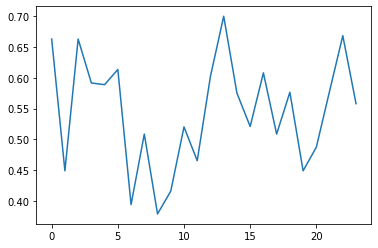

In [9]:
sensor_number = 1
hours = 24*1
sensor_labels = [bucket.y[sensor_number][0].item() for bucket in list(dataset)[:hours]]
sns.lineplot(data=sensor_labels)

In [10]:
train_dataset, _dataset = temporal_signal_split(dataset, train_ratio=0.8)
validation_dataset, test_dataset = temporal_signal_split(_dataset, train_ratio=0.5)


print("Number of train buckets: ", len(set(train_dataset)))
print("Number of test buckets: ", len(set(test_dataset)))

Number of train buckets:  27406
Number of test buckets:  3426


In [18]:
loader.X.shape

torch.Size([207, 2, 34272])

In [13]:
num_timesteps_in = 12
num_timesteps_out = 3

In [14]:
indices = [
            (i, i + (num_timesteps_in + num_timesteps_out))
            for i in range(loader.X.shape[2] - (num_timesteps_in + num_timesteps_out) + 1)
        ]

In [17]:
len(indices)

34258